<a href="https://colab.research.google.com/github/Usama55555/AI-Lab/blob/main/trump_tweets_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
from tqdm import tqdm

import re    # RegEx for removing non-letter characters
import nltk  # natural language processing
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import *

from nltk.sentiment.vader import SentimentIntensityAnalyzer #####

from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

pd.options.plotting.backend = "plotly"

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


/opt/conda/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
# Load Tweet dataset
df0 = pd.read_csv('../input/trump-tweets/realdonaldtrump.csv')
df=df0[['content','retweets','favorites']]
df

,content,retweets,favorites
0,Be sure to tune in and watch Donald Trump on L...,510,917
1,Donald Trump will be appearing on The View tom...,34,267
2,Donald Trump reads Top Ten Financial Tips on L...,13,19
3,New Blog Post: Celebrity Apprentice Finale and...,11,26
4,"""My persona will never be that of a wallflower...",1375,1945
...,...,...,...
43347,Joe Biden was a TOTAL FAILURE in Government. H...,23402,116377
43348,Will be interviewed on @ seanhannity tonight a...,11810,56659
43349,pic.twitter.com/3lm1spbU8X,4959,19344
43350,pic.twitter.com/vpCE5MadUz,4627,17022


In [ ]:
def tweet_to_words(tweet):
    ''' Convert tweet text into a sequence of words '''
    
    # convert to lowercase
    text = tweet.lower()
    # remove non letters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # tokenize
    words = text.split()
    # remove stopwords
    words = [w for w in words if w not in stopwords.words("english")]
    # apply stemming
    words = [PorterStemmer().stem(w) for w in words]
    # return list
    return words

In [ ]:
cleantext=[]
for item in tqdm(df['content']):
    words=tweet_to_words(item)
    cleantext+=[words]
df['cleantext']=cleantext
df

100%|██████████| 43352/43352 [02:08<00:00, 337.36it/s]
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,content,retweets,favorites,cleantext
0,Be sure to tune in and watch Donald Trump on L...,510,917,"[sure, tune, watch, donald, trump, late, night..."
1,Donald Trump will be appearing on The View tom...,34,267,"[donald, trump, appear, view, tomorrow, morn, ..."
2,Donald Trump reads Top Ten Financial Tips on L...,13,19,"[donald, trump, read, top, ten, financi, tip, ..."
3,New Blog Post: Celebrity Apprentice Finale and...,11,26,"[new, blog, post, celebr, apprentic, final, le..."
4,"""My persona will never be that of a wallflower...",1375,1945,"[persona, never, wallflow, rather, build, wall..."
...,...,...,...,...
43347,Joe Biden was a TOTAL FAILURE in Government. H...,23402,116377,"[joe, biden, total, failur, govern, bungl, eve..."
43348,Will be interviewed on @ seanhannity tonight a...,11810,56659,"[interview, seanhann, tonight, 9, 00, p, enjoy]"
43349,pic.twitter.com/3lm1spbU8X,4959,19344,"[pic, twitter, com, 3lm1spbu8x]"
43350,pic.twitter.com/vpCE5MadUz,4627,17022,"[pic, twitter, com, vpce5maduz]"


In [ ]:
# X = list(map(tweet_to_words, df['content']))
# print(X==cleantext) #True

In [ ]:
def unlist(list):
    words=''
    for item in list:
        words+=item+' '
    return words

In [ ]:
def compute_vader_scores(df, label):
    sid = SentimentIntensityAnalyzer()
    df["vader_neg"] = df[label].apply(lambda x: sid.polarity_scores(unlist(x))["neg"])
    df["vader_neu"] = df[label].apply(lambda x: sid.polarity_scores(unlist(x))["neu"])
    df["vader_pos"] = df[label].apply(lambda x: sid.polarity_scores(unlist(x))["pos"])
    df["vader_comp"] = df[label].apply(lambda x: sid.polarity_scores(unlist(x))["compound"])
    df['cleantext2'] = df[label].apply(lambda x: unlist(x))
    return df

In [ ]:
df2 = compute_vader_scores(df,'cleantext')
df2

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,content,retweets,favorites,cleantext,vader_neg,vader_neu,vader_pos,vader_comp,cleantext2
0,Be sure to tune in and watch Donald Trump on L...,510,917,"[sure, tune, watch, donald, trump, late, night...",0.0,0.745,0.255,0.4767,sure tune watch donald trump late night david ...
1,Donald Trump will be appearing on The View tom...,34,267,"[donald, trump, appear, view, tomorrow, morn, ...",0.0,0.652,0.348,0.7506,donald trump appear view tomorrow morn discuss...
2,Donald Trump reads Top Ten Financial Tips on L...,13,19,"[donald, trump, read, top, ten, financi, tip, ...",0.0,0.893,0.107,0.2023,donald trump read top ten financi tip late sho...
3,New Blog Post: Celebrity Apprentice Finale and...,11,26,"[new, blog, post, celebr, apprentic, final, le...",0.0,1.000,0.000,0.0000,new blog post celebr apprentic final lesson le...
4,"""My persona will never be that of a wallflower...",1375,1945,"[persona, never, wallflow, rather, build, wall...",0.0,1.000,0.000,0.0000,persona never wallflow rather build wall cling...
...,...,...,...,...,...,...,...,...,...
43347,Joe Biden was a TOTAL FAILURE in Government. H...,23402,116377,"[joe, biden, total, failur, govern, bungl, eve...",0.0,1.000,0.000,0.0000,joe biden total failur govern bungl everyth to...
43348,Will be interviewed on @ seanhannity tonight a...,11810,56659,"[interview, seanhann, tonight, 9, 00, p, enjoy]",0.0,0.556,0.444,0.4939,interview seanhann tonight 9 00 p enjoy
43349,pic.twitter.com/3lm1spbU8X,4959,19344,"[pic, twitter, com, 3lm1spbu8x]",0.0,1.000,0.000,0.0000,pic twitter com 3lm1spbu8x
43350,pic.twitter.com/vpCE5MadUz,4627,17022,"[pic, twitter, com, vpce5maduz]",0.0,1.000,0.000,0.0000,pic twitter com vpce5maduz


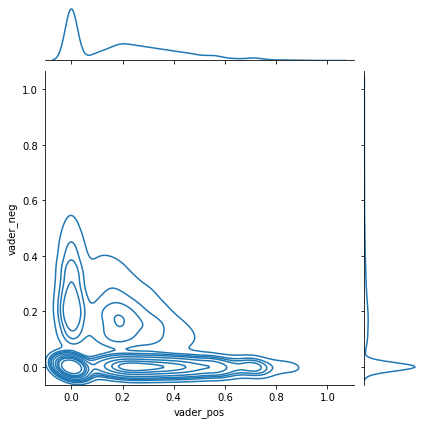

In [ ]:
sns.jointplot(data=df2, x='vader_pos', y='vader_neg', kind="kde")

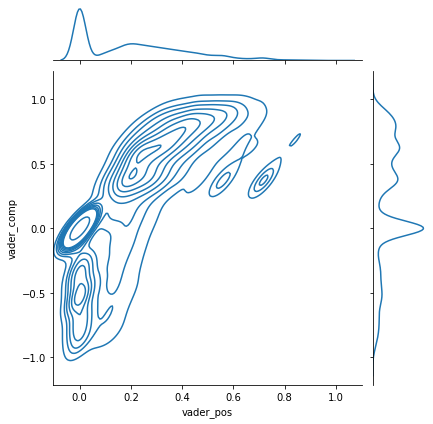

In [ ]:
sns.jointplot(data=df2, x='vader_pos', y='vader_comp', kind="kde")

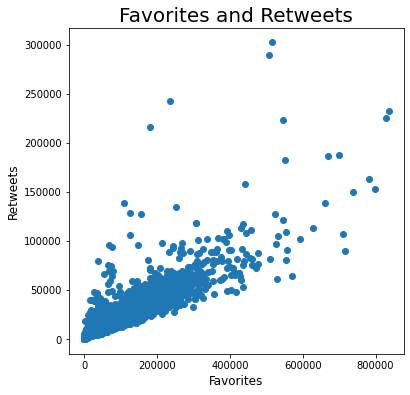

In [ ]:
fig,ax = plt.subplots(figsize=(6,6))
ax.set_title('Favorites and Retweets',fontsize=20)
ax.set_xlabel('Favorites',fontsize=12)
ax.set_ylabel('Retweets',fontsize=12)
ax.scatter(df2.favorites,df2.retweets)

In [ ]:
class0=[]
for i in range(len(df2)):
    if df2.loc[i,'vader_pos']>0.1:
        class0+=[2]
    elif df2.loc[i,'vader_neg']>0.1:
        class0+=[0]        
    else:
        class0+=[1]

In [ ]:
df['class']=class0
df['class'].value_counts()

2    27009
1    10199
0     6144
Name: class, dtype: int64

# def tokenize_pad_sequences(text):

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 5000
max_len=50

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    X = tokenizer.texts_to_sequences(text)
    X = pad_sequences(X, padding='post', maxlen=max_len)
    return X, tokenizer

print('Before Tokenization & Padding \n', df['cleantext2'][0])
X, tokenizer = tokenize_pad_sequences(df['cleantext2'])
print('After Tokenization & Padding \n', X[0])

Before Tokenization & Padding 
 sure tune watch donald trump late night david letterman present top ten list tonight 
After Tokenization & Padding 
 [ 320  503   47   12    5  559   95  592 1042  960  287 1457  770   88
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


In [ ]:
print(X.shape)

(43352, 50)


In [ ]:
y = pd.get_dummies(df['class'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

print('Train Set: ', X_train.shape, y_train.shape)
print('Validation Set: ', X_val.shape, y_val.shape)
print('Test Set: ', X_test.shape, y_test.shape)

Train Set:  (26010, 50) (26010, 3)
Validation Set:  (8671, 50) (8671, 3)
Test Set:  (8671, 50) (8671, 3)


In [ ]:
import tensorflow.keras.backend as K

def f1_score(precision, recall):
    ''' Function to calculate f1 score '''
    
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import datasets
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import History
from tensorflow.keras import losses

In [ ]:
vocab_size = 5000
embedding_size = 32
epochs = 10
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

# Model

In [ ]:
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
# Build model
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))

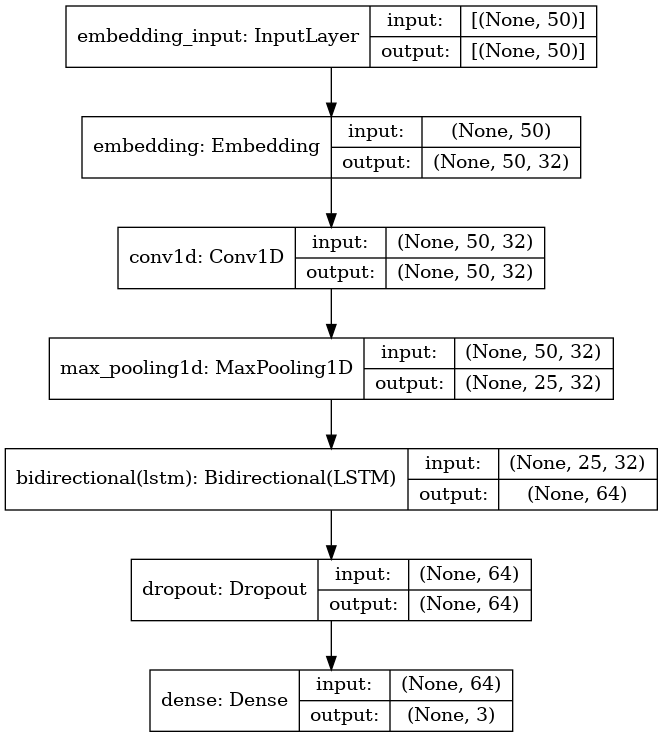

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy', Precision(), Recall()])

In [ ]:
history = model.fit(X_train,y_train,validation_data=(X_val, y_val),batch_size=64,epochs=epochs,verbose=1)

Epoch 1/10
407/407 [==============================] - 12s 22ms/step - loss: 0.9249 - accuracy: 0.6172 - precision: 0.6136 - recall: 0.5870 - val_loss: 0.8800 - val_accuracy: 0.6265 - val_precision: 0.6271 - val_recall: 0.6265
Epoch 2/10
407/407 [==============================] - 8s 19ms/step - loss: 0.8741 - accuracy: 0.6276 - precision: 0.6432 - recall: 0.6046 - val_loss: 0.7488 - val_accuracy: 0.6937 - val_precision: 0.7451 - val_recall: 0.6168
Epoch 3/10
407/407 [==============================] - 8s 19ms/step - loss: 0.7045 - accuracy: 0.7106 - precision: 0.7893 - recall: 0.6109 - val_loss: 0.5494 - val_accuracy: 0.7604 - val_precision: 0.8501 - val_recall: 0.6671
Epoch 4/10
407/407 [==============================] - 8s 19ms/step - loss: 0.5025 - accuracy: 0.7954 - precision: 0.8800 - recall: 0.7197 - val_loss: 0.4220 - val_accuracy: 0.8156 - val_precision: 0.8809 - val_recall: 0.7787
Epoch 5/10
407/407 [==============================] - 8s 19ms/step - loss: 0.4160 - accuracy: 0.826

# Evaluate

In [ ]:
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)

print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))

Accuracy  : 0.8826
Precision : 0.9052
Recall    : 0.8570
F1 Score  : 0.8805


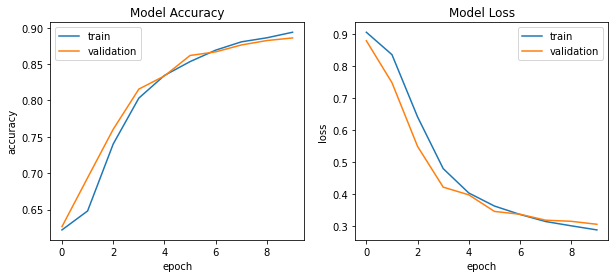

In [ ]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1,2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(history)

2    5387
1    2039
0    1245
dtype: int64
2    5485
1    2187
0     999
dtype: int64


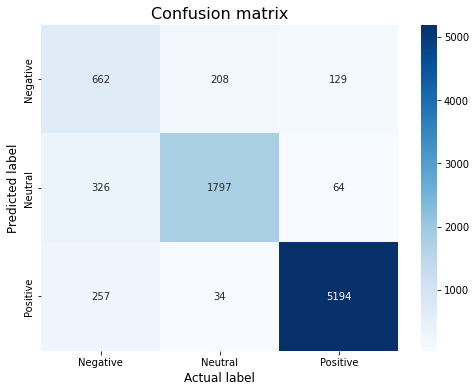

In [ ]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''
    
    sentiment_classes = ['Negative','Neutral', 'Positive']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(y_pred, axis=1),np.argmax(np.array(y_test),axis=1))
    
    print(pd.Series(np.argmax(np.array(y_test),axis=1)).value_counts())
    print(pd.Series(np.argmax(y_pred, axis=1)).value_counts())
    
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)
    
plot_confusion_matrix(model, X_test, y_test)